In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [4]:
file_path = ("Prediction_Data.xlsx")
sheet_name = "db_churn vw_churndata"


In [5]:
data = pd.read_excel(file_path,sheet_name=sheet_name)
print(data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [7]:
data = data.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)
data

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Male,35,No,Delhi,7,27,NaN,Yes,No,Yes,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,Yes,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,Yes,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,Female,41,No,Uttar Pradesh,6,33,NaN,Yes,Yes,Yes,...,Month-to-Month,Yes,Credit Card,74.40,896.75,0.00,0,37.96,934.71,Churned
6003,Male,51,Yes,Haryana,0,19,Deal 1,No,No,Yes,...,Two Year,No,Credit Card,45.25,3139.80,0.00,0,0.00,3139.80,Stayed
6004,Female,65,Yes,Kerala,14,25,NaN,Yes,Yes,Yes,...,Month-to-Month,Yes,Bank Withdrawal,74.95,2869.85,0.00,0,599.64,3469.49,Churned
6005,Male,23,No,Odisha,2,10,NaN,Yes,Yes,Yes,...,One Year,Yes,Credit Card,70.15,4480.70,0.00,0,2107.52,6588.22,Stayed


In [10]:
columns_to_encode = [
    'Gender','Married','State','Value_Deal','Phone_Service',
    'Multiple_Lines','Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

In [11]:
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [12]:
data['Customer_Status'] = data['Customer_Status'].map({"Stayed" : 0 , "Churned" : 1})

In [13]:
X = data.drop('Customer_Status',axis=1)
y = data['Customer_Status']

In [15]:
y.value_counts(normalize=True)


Customer_Status
0    0.71167
1    0.28833
Name: proportion, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [17]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [19]:
from sklearn.metrics import accuracy_score , precision_score , recall_score ,f1_score

In [20]:
y_pred = rf.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
print(f"Precisin Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"F1 Score : {f1_score(y_test,y_pred)}")
print(f"Confusion Matrix : {confusion_matrix(y_test,y_pred)}")

Accuracy Score : 0.8427620632279534
Precisin Score : 0.8015267175572519
Recall Score : 0.6051873198847262
F1 Score : 0.6896551724137931
Confusion Matrix : [[803  52]
 [137 210]]


In [21]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

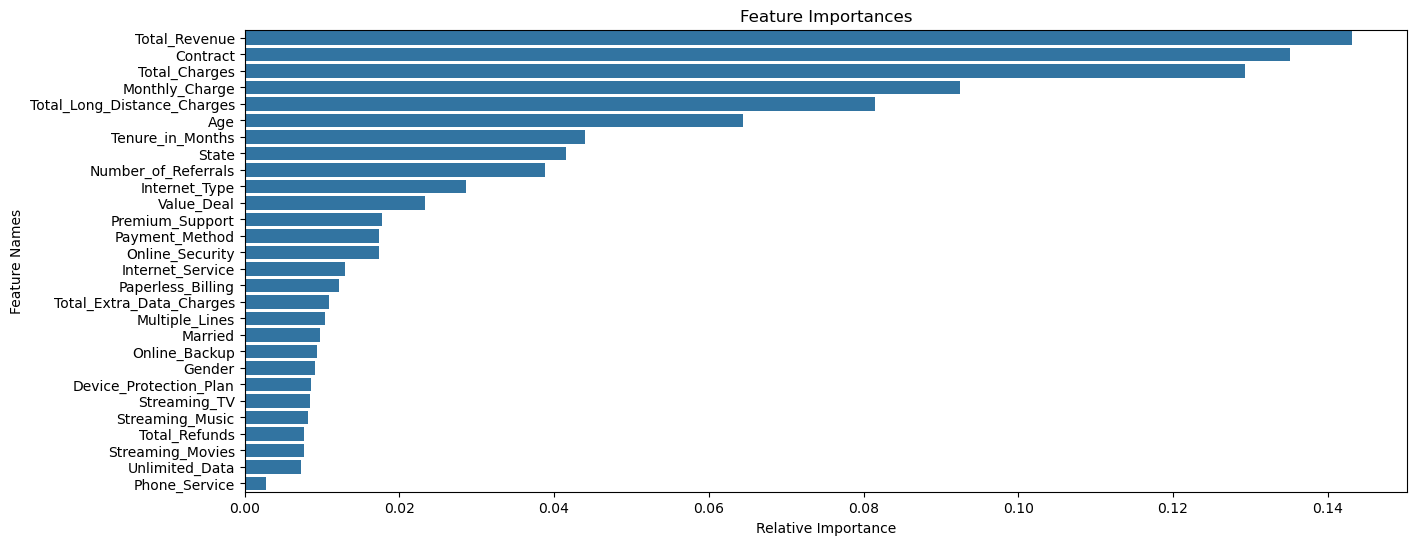

In [22]:
plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

Target distribution:
Customer_Status
0    0.71167
1    0.28833
Name: proportion, dtype: float64
--- Training set metrics ---
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1: 1.0
Train ROC AUC: 1.0
--- Test set metrics ---
Test Accuracy: 0.8427620632279534
Test Precision: 0.8015267175572519
Test Recall: 0.6051873198847262
Test F1: 0.6896551724137931
Test ROC AUC: 0.8913342433894534
Train acc: 1.0000, Test acc: 0.8428
5-fold ROC AUC CV mean: 0.8942817215004217 std: 0.013893613526209455


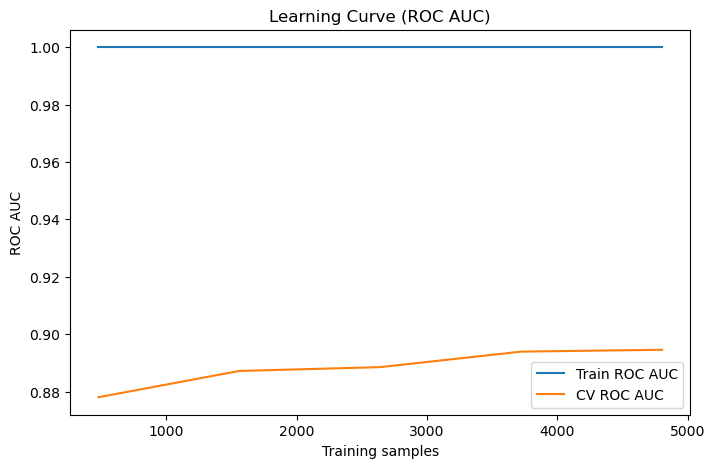

In [23]:
# Basic target distribution check
print('Target distribution:')
print(y.value_counts(normalize=True))

# Evaluate on training set to check for overfitting
y_train_pred = rf.predict(X_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
print('--- Training set metrics ---')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Train Precision:', precision_score(y_train, y_train_pred))
print('Train Recall:', recall_score(y_train, y_train_pred))
print('Train F1:', f1_score(y_train, y_train_pred))
try:
    print('Train ROC AUC:', roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]))
except Exception as e:
    print('ROC AUC (train) failed:', e)

# Evaluate on test set (existing predictions)
print('--- Test set metrics ---')
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Test Precision:', precision_score(y_test, y_pred))
print('Test Recall:', recall_score(y_test, y_pred))
print('Test F1:', f1_score(y_test, y_pred))
try:
    print('Test ROC AUC:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
except Exception as e:
    print('ROC AUC (test) failed:', e)

# Compare train vs test to detect overfitting
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)
print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

# Cross-validated ROC AUC to get a more stable estimate
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_cv = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print('5-fold ROC AUC CV mean:', roc_cv.mean(), 'std:', roc_cv.std())

# Learning curve (ROC AUC) to visualize bias vs variance
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(rf, X, y, cv=cv, scoring='roc_auc', train_sizes=np.linspace(0.1,1.0,5), n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, label='Train ROC AUC')
plt.plot(train_sizes, val_scores_mean, label='CV ROC AUC')
plt.xlabel('Training samples')
plt.ylabel('ROC AUC')
plt.legend()
plt.title('Learning Curve (ROC AUC)')
plt.show()

In [24]:
# Hyperparameter tuning with RandomizedSearchCV (keep job small for interactivity)
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}
rs = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=30, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=42)
rs.fit(X_train, y_train)
print('Best params:', rs.best_params_)
best = rs.best_estimator_
y_pred_best = best.predict(X_test)
print('--- Best model test metrics ---')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))
try:
    print('ROC AUC test:', roc_auc_score(y_test, best.predict_proba(X_test)[:,1]))
except Exception as e:
    print('ROC AUC (best) failed:', e)

# Save the tuned model
joblib.dump(best, 'rf_best_model.joblib')
print('Saved tuned model to rf_best_model.joblib')

Best params: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced_subsample'}
--- Best model test metrics ---
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       855
           1       0.71      0.77      0.74       347

    accuracy                           0.84      1202
   macro avg       0.80      0.82      0.81      1202
weighted avg       0.85      0.84      0.84      1202

ROC AUC test: 0.8914100813994641
Saved tuned model to rf_best_model.joblib


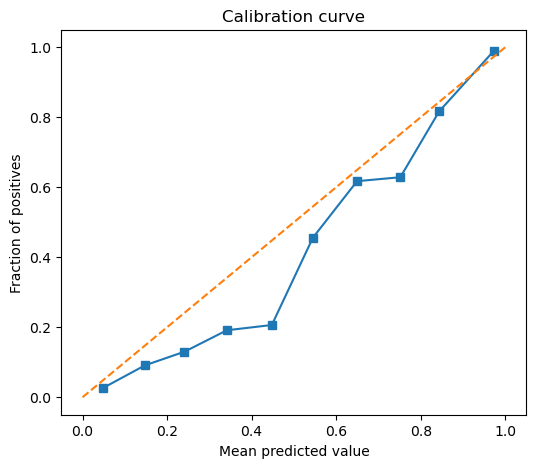

In [25]:
# Calibration check for probability outputs
from sklearn.calibration import calibration_curve
prob_pos = best.predict_proba(X_test)[:,1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
plt.figure(figsize=(6,5))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0,1], [0,1], '--')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.show()

In [26]:
file_path = r"Prediction_Data.xlsx"
sheet_name = "db_churn vw_joindata"

In [27]:
new_data = pd.read_excel(file_path ,sheet_name=sheet_name)
print(new_data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7        NaN           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Cre

In [28]:
orignal_data = new_data.copy()

In [29]:
customer_ids = new_data['Customer_ID']

In [30]:
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [31]:
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].fit_transform(new_data[column])

In [32]:
new_predictions = rs.predict(new_data)

In [33]:
orignal_data['Customer Status Predicted'] = new_predictions

In [36]:
orignal_data = orignal_data[orignal_data['Customer Status Predicted'] ==1]
orignal_data.shape

(364, 33)

In [37]:
orignal_data.to_csv(r"D:\Churn Analysis + ML + Power BI\Predictions.csv",index=False)

In [40]:
print("Confustion Matrix :" , confusion_matrix(y_test,y_pred))

Confustion Matrix : [[803  52]
 [137 210]]
